<h1>CS4618: Artificial Intelligence I</h1>
<h1>Datasets</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import rand
from sklearn.metrics.pairwise import euclidean_distances

<h1>Features</h1>
<ul>
    <li>Suppose we want to store data about objects, such as houses.</li>
    <li><b>Features</b> describe the houses, e.g.
        <ul>
            <li>$\mathit{flarea}$: the total floor area (in square metres);</li>
            <li>$\mathit{bdrms}$: the number of bedrooms;</li>
            <li> $\mathit{bthrms}$: the number of bathrooms.</li>
        </ul>
    </li>
    <li>A particular house has <b>values</b> for the features:
        <ul>
            <li>e.g. your house: $\mathit{flarea} = 126, \mathit{bdrms} = 3, \mathit{bthrms} = 1$.</li>
        </ul>
    </li>
    <li>Then we can represent a house using a vector:
        <ul>
            <li>e.g. your house: $\cv{126\\3\\1}$
        </ul>
    </li>
    <li>We will always use $n$ to refer to the number of features, e.g. above $n = 3$.</li>
</ul>

<h1>Examples</h1> 
<ul>
    <li>Suppose we collect a <b>dataset</b> containing data about lots of houses, e.g.:
        $$\cv{126\\3\\1} \,\, \cv{92.9\\3\\2} \,\,\cv{171.9\\4\\3} \,\, \cv{79\\3\\1}$$
    </li>
    <li>Each member of this dataset is called an <b>example</b>, and we will use $m$ to refer to the number of examples, e.g.
        above $m = 4$.
    </li>
<ul>

<h1>Dataset notation</h1>
<ul>
    <li>We will use a <em>superscript</em> to index the examples.
        <ul>
            <li>
                $\v{x}^{(i)}$ will be the $i$th example.
            </li>
            <li>
                The first example in the dataset is $\v{x}^{(1)}$, the second is $\v{x}^{(2)}$, $\ldots$, 
                the last is $\v{x}^{(m)}$ (Note, we index from 1.)
            </li>
            <li>
                We're writing the superscript in parentheses to make it clear that we are using it for indexing.
                It is not 'raising to a power'. If we want to raise to a power, we will drop the parentheses.
            </li>
        </ul>
    </li>
    <li>We will use a <em>subscript</em> to index the features (again starting from 1).</li>
    <li>Class exercise. Using the dataset from above:
        <ul>
            <li>what is $\v{x}_2^{(1)}$?</li>
            <li>what is $\v{x}_1^{(2)}$?</li>
        </ul>
    </li>
</ul>

<h1>Dataset as a matrix</h1>
<ul>
    <li>We can represent a dataset $\Set{\v{x}^{(1)}, \v{x}^{(2)}, \ldots, \v{x}^{(m)}}$ as a $m \times n$
        matrix $\v{X}$ as follows:
        $$\v{X} = \begin{bmatrix}
              \v{x}_1^{(1)} & \v{x}_2^{(1)} & \ldots & \v{x}_n^{(1)} \\
              \v{x}_1^{(2)} & \v{x}_2^{(2)} & \ldots & \v{x}_n^{(2)} \\
              \vdots        & \vdots        & \vdots & \vdots \\
              \v{x}_1^{(m)} & \v{x}_2^{(m)} & \ldots & \v{x}_n^{(m)} \\
              \end{bmatrix}
        $$
    </li>
    <li>Note how each example becomes a <em>row</em> in $\v{X}$.</li>
    <li>You can think of row $i$ as the transpose of $\v{x}^{(i)}$.</li>
    <li>For the example dataset, we get:
        $$\v{X} = 
            \begin{bmatrix}
                126 & 3 & 1 \\
                92.9 & 3 & 2 \\
                171.9 & 4 & 3 \\
                79 & 3 & 1
            \end{bmatrix}
        $$
    </li>
</ul>

<h1>Cork Property Prices Dataset</h1>
<ul>
    <li>In August 2019, I scraped a dataset of property prices for Cork city from www.daft.ie.</li>
    <li>They are in a CSV file. Each line in the file is an example, representing one house.</li>
    <li>Hence, each line of the file contains the feature-values for the floor area, number of bedrooms, number of
        bathrooms, and several other features that we will ignore for now.
    </li>
    <li>We will use the pandas library:
        <ul>
            <li>to read the dataset from the csv file into what pandas calls a DataFrame;</li>
            <li>to explore the dataset: looking at values and computing summary statistics.</li>
        </ul>
    </li>
    <li>Then we will extract some of the features (columns) and convert to a numpy 2D array, before using the data
        to find houses similar to yours.
    </li>
</ul>

<h2>Using pandas to Read and Explore the Data</h2>

In [3]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("../datasets/dataset_corkA.csv")

In [4]:
# The dimensions
df.shape

(464, 4)

In [5]:
# The features
df.columns

Index(['flarea', 'bdrms', 'bthrms', 'price'], dtype='object')

In [6]:
# The datatypes
df.dtypes

flarea    float64
bdrms       int64
bthrms      int64
price       int64
dtype: object

In [7]:
# The columns and datatypes (again) but also whether there are any nulls in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   flarea  464 non-null    float64
 1   bdrms   464 non-null    int64  
 2   bthrms  464 non-null    int64  
 3   price   464 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 14.6 KB


In [8]:
# Summary statistics
df.describe(include="all")

,flarea,bdrms,bthrms,price
count,464.000000,464.000000,464.000000,464.000000
mean,125.460151,3.329741,2.120690,352.297414
std,70.692202,1.068445,1.061033,197.464495
min,40.000000,1.000000,1.000000,95.000000
25%,82.000000,3.000000,1.000000,235.000000
50%,110.000000,3.000000,2.000000,295.000000
75%,140.600000,4.000000,3.000000,395.000000
max,575.000000,9.000000,6.000000,1495.000000


In [9]:
# A few of the examples
df.head(3)

,flarea,bdrms,bthrms,price
0,111.9,3,3,305
1,95.0,3,3,255
2,120.8,3,3,275


<h2>Convert to a numpy 2D array</h2>
<ul>
    <li>We will select certain features (columns) from the pandas DataFrame
        and convert to a 2D numpy array
    </li>
    <li>(Later in the module, we will use a <code>ColumnTransformer</code> to do this.)</li>
</ul>

In [10]:
# The features we want to select
features = ["flarea", "bdrms", "bthrms"]

# Extract these features and convert to numpy 2D array
X = df[features].values

In [11]:
# Let's take a look at a few rows in X - to show you that we now have a 2D numpy array
X[:3]

array([[111.9,   3. ,   3. ],
       [ 95. ,   3. ,   3. ],
       [120.8,   3. ,   3. ]])

<h1>Similarity &amp; Distance</h1>
<ul>
    <li>In AI, we often want to know how <em>similar</em> one object is to another.
        <ul>
            <li>E.g. how similar is my house to yours?</li>
            <li>E.g. which house in our dataset is most similar to yours?</li>
        </ul>
    </li>
    <li>In fact, here we are instead going to measure how <em>different</em> they are using a <b>distance function</b>.
        <ul>
            <li>(N.B. This is not about geographical distance.)</li>
        </ul>
    </li>
    <li>Let $\v{x}$ be one vector of feature values and $\v{x}'$ be another.</li>
    <li>Simplest is to measure their <b>Euclidean distance</b>:
        $$d(\v{x}, \v{x}') = \sqrt{(\v{x}_1 - \v{x}_1')^2 + (\v{x}_2 - \v{x}_2')^2 + \ldots + (\v{x}_n - \v{x}_n')^2}$$
        or, more concisely:
        $$d(\v{x}, \v{x}') = \sqrt{\sum_{j=1}^n(\v{x}_j - \v{x}_j')^2}$$
    </li>
    <li>Euclidean distance has a minimum value of 0 (meaning identical) but no maximum value (depends on your data).</li>
    <li>Class exercise. What is the Euclidean distance between $\v{x} = \cv{100\\1\\4}$ and $\v{x}' = \cv{100\\5\\1}$?</li>
</ul>

<h2>Euclidean Distance in numpy</h2>
<ul>
    <li>It has a nice vectorized implementation (no loop!) using numpy:</li>
</ul>

In [12]:
def euc(x, xprime):
    return np.sqrt(np.sum((x - xprime)**2))

In [13]:
# Example
your_house = np.array([126.0, 3, 1])
my_house = np.array([107.0, 2, 1])

euc(your_house, my_house)

19.026297590440446

<ul>
    <li>We can compute the distance between your house and all the houses in X.</li>
    <li>(We have to write a loop here, because our <code>euc</code> function is not vectorized.)</li>
</ul>

In [14]:
dists = [euc(your_house, x) for x in X]

In [15]:
# Just to show you, here are the first 3 distances
dists[:3]

[14.241137595009741, 31.064449134018133, 5.571355310873651]

In [16]:
# Even better, we can, with one line of code, find the most similar house
np.min([euc(your_house, x) for x in X])

1.0332473082471605

In [17]:
# Even better again, we can find which house is the most similar
np.argmin([euc(your_house, x) for x in X])

196

In [18]:
# Best of all, we can display the most similar house
df.iloc[np.argmin([euc(your_house, x) for x in X])]

flarea    125.74
bdrms       3.00
bthrms      2.00
price     398.00
Name: 196, dtype: float64

<h1>Problems with Euclidean distance</h1>
<ul>
    <li>There are at least three problems with Euclidean distance (and many other distance measures too):
        <ul>
            <li>Features with different scales;</li>
            <li>Features that are correlated with each other;</li>
            <li>The curse of dimensionality.</li>
        </ul>
    </li>
</ul>

<h1>Scaling Numeric Values</h1>
<ul>
    <li>Different numeric-valued features often have very different ranges.
        <ul>
            <li>E.g. the values for floor area are going to range from a few tens to a few hundreds of square metres.</li>
            <li>But the number of bedrooms and bathrooms is going to range from 0 to a dozen or so at most.
        </ul>
    </li>
    <li>
        When computing the Euclidean distance, features with large ranges will dominate the distance calculations, 
        thus giving features with small ranges negligible influence.
    </li>
    <li>
        E.g., consider your house $\v{x} = \cv{126\\3\\1}$ and two others, $\v{y} = \cv{131\\3\\1}$ and
        $\v{z} = \cv{126\\7\\1}$. 
        <ul>
            <li><em>Intuitively</em>, which house is more similar to yours, $\v{y}$ or $\v{z}$?</li>
            <li>Now compute the Euclidean distances.</li>
            <li>According to these distances, which house is more similar to yours?</li>
        </ul>
    </li>
    <li>
        The solution is to <b>scale</b> (or 'normalize') the values so that they have similar ranges.
    </li>
    <li>There are several ways to do this. One is <b>min-max scaling</b>, but the one we'll discuss is <b>standardization</b>.
    </li>
</ul>

<h2>Standardization</h2>
<ul>
    <!--
    <li>In some cases, you don't want feature values to have the same range but to have the same mean
        and even the same variance
    </li>
    -->
    <li>
        One idea is <b>mean centering</b>, where you subtract the mean value of the feature.
        <ul>
            <li>If you do this to all values, some of the new values will be positive and some will be negative and 
                their mean will be approximately zero.
            </li>
        </ul>
    </li>
    <li>But better still is <b>standardization</b>, in which you subtract the mean and divide by the standard
        deviation:
        $$\v{x}_j \gets \frac{\v{x}_j - \mu_j}{\sigma_j}$$
        where $\mu_j$ is the mean of the values for feature $j$ and $\sigma_j$ is their standard deviation
    </li>
    <li>
        If you use this, then the mean will be approximately zero, the standard deviation will be 1.
    </li>
</ul>

<h2>Standardization in scikit-learn</h2>
<ul>
    <li>scikit-learn provides a class called <code>StandardScaler</code>.
    </li>
    <li>It uses means and standard deviations that it calculates from your dataset. (Statisticians would say that it should
        use the population mean and standard deviation, but these are generally not known.)
    </li>
    <li>We create the scaler and then run its <code>fit</code> and <code>transform</code> methods.</li>
    <li>(Later in the module, when we are using a <code>ColumnTransformer</code>, running these methods
        will be done for us.)
    </li>
</ul>

In [19]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
# Let's take a look at a few rows in X
X_scaled[:3]

array([[-0.19202665, -0.30895098,  0.82962481],
       [-0.43134924, -0.30895098,  0.82962481],
       [-0.06599286, -0.30895098,  0.82962481]])

In [21]:
# Let's scale your house too
# Don't try to understand or copy this code - it's a hack that you won't need
your_house = np.array([[126.0, 3, 1]])
your_house_scaled = scaler.transform(your_house)[0]
your_house_scaled

array([ 0.00764486, -0.30895098, -1.05736495])

In [22]:
# To see what effect this has had, let's see which house is most similar to yours
np.argmin([euc(your_house_scaled, x) for x in X_scaled])

328

In [23]:
df.iloc[np.argmin([euc(your_house_scaled, x) for x in X_scaled])]

flarea    122.4
bdrms       3.0
bthrms      1.0
price     295.0
Name: 328, dtype: float64

<h1>Features that are Correlated</h1>
<ul>
    <li>Let's start with an extreme example. 
        <ul>
            <li>Suppose one feature is the floor area in square metres and
                another is the floor area in square feet.
                Then it's clear that, even after scaling, when calculating distances, floor area will have greater
                influence than other features, such as the number of bedrooms, because it is in the dataset twice.
            </li>
            <li>Examples are often less stark. For example, floor area and the number of bedrooms are correlated,
                and so their contributions to the distance calculations are not independent of each other.
            </li>
        </ul>
    </li>
    <li>Ideally the features should be independent (at least, linearly independent).</li>
    <li>Yet, few people who use distances do anything about this problem!</li>
    <li>Solutions (which we're not covering in detail) include feature weighting and projections to
        a new feature space whose features are (linearly) independent (e.g. using Principal Component
        Analysis).
    </li>
</ul>

<h1>The Curse of Dimensionality</h1>
<ul>
    <li>In some datasets, examples have thousands or even millions of features.
        <ul>
            <li>E.g. datasets from astronomy;</li>
            <li>E.g. datasets of images and videos;</li>
            <li>E.g. datasets of documents where each unique word is a feature.</li>
        </ul>
    </li>
    <li>Is it better or worse to have more features?
        <ul>
            <li>Storage and processing costs increase.</li>
            <li>Apart from efficiency, intuitively, more features is better:
                <ul>
                    <li>e.g. describing houses more completely.</li>
                </ul>
            </li>
            <li>But, counter-intuitively, that isn't true in general.
                <ul>
                    <li>As the number of features grows, algorithms that use distance and density, will find it harder 
                        to find good solutions.
                    </li>
                    <li>The problems that arise as the number of features grows have been called <b>the curse of dimensionality</b>.
    </li>
                </ul>
            </li>
        </ul>
    </li>
    

<h2>Example of the Curse of Dimensionality</h2>
<ul>
    <li>The code that follows (which you don't need to study):
        <ul>
            <li>generates a random dataset where $m = 400$ and $n = 2$ and both features have values in $[0, 1)$;
            </li>
            <li>computes the Euclidean distance between all pairs of examples;</li>
            <li>finds $d_{\mathit{min}}$, the smallest of these distances;</li>
            <li>finds $d_{\mathit{max}}$, the largest of the distances;</li>
            <li>computes the ratio $\frac{d_{\mathit{max}}}{d_{\mathit{min}}}$.</li>
        </ul>
    </li>
    <li>It then does this all again but with $n = 3, 4, 5,\ldots,500$.</li>
    <li>Then it plots the ratios that it has computed ($y$-axis, but note its scale) against $n$ ($x$-axis).</li>
</ul>

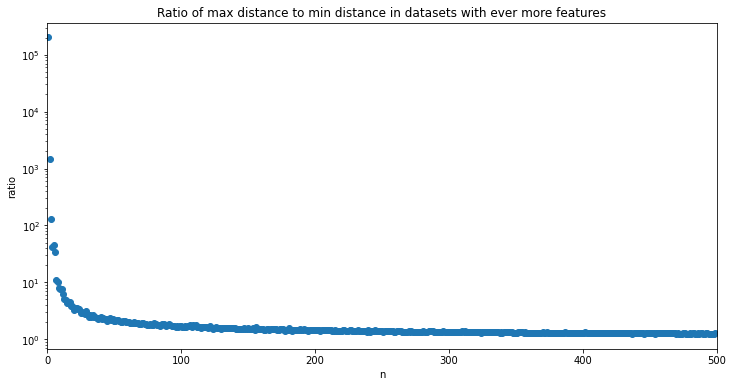

In [24]:
m = 400
n_range = range(1, 500)

ratios = []
for n in n_range:
    X = rand(m, n)
    dists = euclidean_distances(X)
    non_zero_dists = dists[dists > 0]
    ratios += [np.max(non_zero_dists) / (np.min(non_zero_dists))]
    
fig = plt.figure(figsize=(12,6))
plt.title("Ratio of max distance to min distance in datasets with ever more features")
plt.scatter(n_range, ratios)
plt.yscale('log')
plt.xlabel("n")
plt.xlim(0, 500)
plt.ylabel("ratio")
plt.show()

<ul>
    <li>As $n \rightarrow \infty$, $d_{\mathit{max}} \rightarrow d_{\mathit{min}}$, so their ratio tends to 1.</li>
</ul>

In [25]:
# Since it may not be clear from the graph, we'll show the last 5 of the ratios that it calculated
ratios[-5:]

[1.2591308099625442,
 1.2590473591652522,
 1.2520789067802196,
 1.2458021668678823,
 1.2617260697884]

<ul>
    <li>We conclude (counter-intutively) that examples become equi-distant!</li>
    <li>This obviously undermines methods that depend on finding objects that are similar to each other, as we were
        doing earlier &mdash; with more features, the most similar object becomes more arbitrary!
    </li>
    <li>The problem extends to other distance/similarity measures, e.g. cosine similarity.</li>
    <li>Fortunately, there are lots of methods available for reducing dimensionality.
        One solution is to retain the principle components found by Principal Component Analysis. This is
        interesting because PCA was suggested above as a solution to the problem of correlated features. 
        It can actually help us solve both problems.
    </li>
</ul>